In [1]:
# Importing the Libraries for Data Analysing, Data Visualizing, Data Preppping & Model Building 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.grid_search import RandomizedSearchCV, GridSearchCV
from sklearn import cross_validation
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/VKY/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/VKY/anaconda/lib/python3.6/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
# Loading the training and testing datasets into DataFrames
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [3]:
# Checking the shape of training dataframe
train_df.shape

(891, 12)

In [4]:
# Checking top 5 observations from the training dataframe
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# Checking basic statistics for the continous data in training dataframe
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
# Checking statistics for the categorical data in training dataframe
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Flynn, Mr. John",male,CA. 2343,C23 C25 C27,S
freq,1,577,7,4,644


In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [8]:
# Checking missing values in the training dataframe
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
# Checking missing values in the testing dataframe
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [10]:
# Filling missing values of Embarked with Frontfill method
train_df["Embarked"].fillna(method="ffill", inplace=True)

In [11]:
# Filling missing values of Fare with Median 
test_df["Fare"].fillna(test_df["Fare"].median(), inplace=True)

In [12]:
# Combining siblings/spouses and parents/children into new variable Family
def familysize(df):
    df['Family'] = df['SibSp'] + df['Parch']
    df.drop(["SibSp", "Parch"], axis=1, inplace=True)
    
familysize(train_df)
familysize(test_df)

In [13]:
# Converting Sex data into dummy indicators
train_df['Sex'] = pd.get_dummies(train_df.Sex)['female']
test_df['Sex'] = pd.get_dummies(test_df.Sex)['female']

In [14]:
# Converting Embarked data into dummy indicators
def embarkation(df):
    df.loc[df['Embarked'] == 'S', 'Embarked'] = 0
    df.loc[df['Embarked'] == 'C', 'Embarked'] = 1
    df.loc[df['Embarked'] == 'Q', 'Embarked'] = 2
    
embarkation(train_df)
embarkation(test_df)

In [15]:
# Dropping out the invaluable features 
def useless(df):
    df.drop(["Ticket", "Name", "Cabin"], axis=1, inplace=True)

useless(train_df)
useless(test_df)

In [16]:
print(train_df.shape)
print(test_df.shape)

(891, 8)
(418, 7)


In [17]:
# Building a predictive model for the missing values in Age 
mask = train_df["Age"].isnull()
age_test = train_df[mask]
age_train = train_df[~mask].dropna()

In [18]:
age_y = age_train["Age"]
age_X = age_train.drop("Age", axis=1)
rfr_train = RandomForestRegressor(n_estimators=200)
rfr_train.fit(age_X, age_y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [19]:
# Predicting missing values in Age using the generated model
train_df.loc[mask, "Age"] = rfr_train.predict(age_test.drop("Age", axis=1))
train_df['Age'] = train_df['Age'].astype(int)

In [20]:
# No more missing values in the training dataset
train_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
Fare           0
Embarked       0
Family         0
dtype: int64

In [21]:
# Building a predictive model for the missing values in Age 
mask = test_df["Age"].isnull()
age_test = test_df[mask]
age_train = test_df[~mask].dropna()

In [22]:
age_y = age_train["Age"]
age_X = age_train.drop("Age", axis=1)
rfr_test = RandomForestRegressor(n_estimators=200)
rfr_test.fit(age_X, age_y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [23]:
# Predicting missing values in Age using the generated model
test_df.loc[mask, "Age"] = rfr_test.predict(age_test.drop("Age", axis=1))
test_df['Age'] = test_df['Age'].astype(int)

In [24]:
# No more missing values in the testing dataset
test_df.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
Fare           0
Embarked       0
Family         0
dtype: int64

In [205]:
# def agegroup(df):
#     df.loc[df['Age'] <= 18, 'Age'] = 0
#     df.loc[df['Age'] > 18, 'Age'] = 1

In [85]:
# def farescale(df):
#     df.loc[df['Fare'] <= 31, 'Fare'] = 0
#     df.loc[df['Fare'] > 31, 'Fare'] = 1

In [25]:
# Extracting the target variable
y = train_df.pop("Survived")

In [26]:
# Copying the final processed datasets 
train = train_df.copy()
test = test_df.copy()

In [27]:
print(train.shape)
print(test.shape)

(891, 7)
(418, 7)


In [28]:
train.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Family
0,1,3,0,22,7.2500,0,1
1,2,1,1,38,71.2833,1,1
2,3,3,1,26,7.9250,0,0
3,4,1,1,35,53.1000,0,1
4,5,3,0,35,8.0500,0,0


In [29]:
# Creating train/test split from training dataset
X_train, X_test, y_train, y_test = train_test_split(train, y, test_size=0.2, random_state=42)

In [39]:
# Performing RanmomizedSearch to cross validate the hyperparameters for the RF Classifier
hyperparameters = {'n_estimators': [500,1000], 
                   'max_features': ['auto', 'sqrt', 'log2'],
                   'min_samples_split': [3, 5, 7, 9], 
                   'min_samples_leaf': [1, 3, 5, 7],
                   'criterion': ['entropy', 'gini'],
                   'oob_score': [True, False]
                  }
rfc = RandomForestClassifier(n_jobs=-1, random_state=42)

search =  RandomizedSearchCV(rfc, hyperparameters, cv=10, scoring='roc_auc')

In [40]:
# Training the model
search.fit(X_train, y_train)

RandomizedSearchCV(cv=10, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=-1, oob_score=False, random_state=42,
            verbose=0, warm_start=False),
          fit_params={}, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'n_estimators': [500, 1000], 'max_features': ['auto', 'sqrt', 'log2'], 'min_samples_split': [3, 5, 7, 9], 'min_samples_leaf': [1, 3, 5, 7], 'criterion': ['entropy', 'gini'], 'oob_score': [True, False]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          scoring='roc_auc', verbose=0)

In [41]:
# Best score of the model
search.best_score_

0.8492450797226078

In [42]:
# Best parameters of the model
search.best_params_

{'criterion': 'entropy',
 'max_features': 'sqrt',
 'min_samples_leaf': 3,
 'min_samples_split': 5,
 'n_estimators': 1000,
 'oob_score': True}

In [43]:
# Best estomator of the model
search.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=3,
            min_samples_split=5, min_weight_fraction_leaf=0.0,
            n_estimators=1000, n_jobs=-1, oob_score=True, random_state=42,
            verbose=0, warm_start=False)

# Final Model

In [30]:
# Building the final RF Classifier model with best parameters
rfc_final = RandomForestClassifier(n_estimators=200,  
                                   n_jobs=-1, 
                                   max_depth=10,
                                   random_state=42,  
                                   min_samples_split=2)
rfc_final.fit(X_train, y_train)
roc = roc_auc_score(y_test, rfc_final.predict_proba(X_test)[:,1])
print("AUC: ", roc)
score = rfc_final.score(train, y)
print("Accuracy: ", score)

AUC:  0.907464607465
Accuracy:  0.934904601571


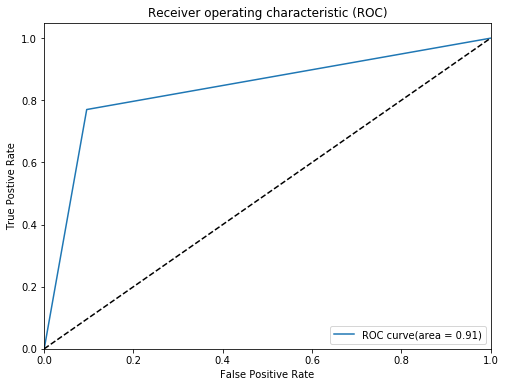

In [31]:
# Visualizing -> Area Under the Curve (AUC)
fpr, tpr, thresholds = roc_curve(y_test, rfc_final.predict(X_test))

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label='ROC curve(area = %0.2f)' %roc)
plt.plot([0,1], [0,1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Postive Rate')
plt.title('Receiver operating characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

[ 0.15957116  0.08836584  0.28744814  0.1734592   0.19009349  0.03033484
  0.07072734]


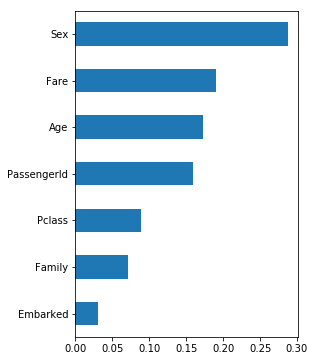

In [32]:
# Feature importance in contributing the prediction
print(rfc_final.feature_importances_)
featureimportance = pd.Series(rfc_final.feature_importances_, index=train.columns)
featureimportance.sort_values(inplace=True)

featureimportance.plot(kind='barh', figsize=(4,6))

In [34]:
# Cross validating with k-folds
scores = cross_validation.cross_val_score(rfc_final, train, y, cv=10)
print(scores)
print(scores.mean())

[ 0.78888889  0.81111111  0.76404494  0.86516854  0.93258427  0.86516854
  0.84269663  0.83146067  0.85393258  0.81818182]
0.837323799796
